In [7]:
# library("showtext")
# font_files()
# showtext_auto(enable = TRUE)
# font_add('Songti', 'Songti.ttc')

library("ggplot2")
library('interactions')

In [8]:
dat<-read.csv('music_dataset_regression.csv')

In [38]:
dat$song_per_album_log = log(dat$song_number/dat$album_number)

In [3]:
head(dat)

Unnamed..0,album_id_x,album_name_x,album_size_x,music_id,music_name,music_score_x,artist_name_x,artist_id_x,artist_albumSize,⋯,mlyric_er,mlyric_jing,comment_log,contentlength_log,musicscore_log,like_log,male,female,songnum_log,albumnum_log
<int>,<int>,<fct>,<int>,<int>,<fct>,<dbl>,<fct>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
0,98887598,奔山赴海去见你,2,1499014574,奔山赴海去见你,100,阿冗,30116848,13,⋯,0,0,7.210818,4.001254,4.60517,4.465142,1,0,3.367296,2.639057
2,97891010,三个字,2,1492899961,三个字,100,阿冗,30116848,13,⋯,1,0,7.890957,3.568593,4.60517,5.835785,1,0,3.367296,2.639057
4,91648613,靠窗,6,1458789926,情歌几句,100,阿冗,30116848,13,⋯,1,0,8.213653,3.541925,4.60517,6.823068,1,0,3.367296,2.639057
5,91648613,靠窗,6,1458990369,靠窗,100,阿冗,30116848,13,⋯,1,0,7.832808,3.913355,4.60517,5.987624,1,0,3.367296,2.639057
6,91648613,靠窗,6,1458994212,你我之间,100,阿冗,30116848,13,⋯,0,0,8.249052,3.325036,4.60517,7.046763,1,0,3.367296,2.639057
10,94506779,喃喃自问,2,1474114788,喃喃自问,100,阿冗,30116848,13,⋯,0,0,7.178545,3.436135,4.60517,5.197023,1,0,3.367296,2.639057


In [4]:
model = lm(comment_log~like_log+male+female+like_log*male+like_log*female+model_topic4+model_topic4*like_log,
          data = dat)

In [28]:
model5 = lm(comment_log~like_log+male+female+like_log*male+like_log*female+model_topic5+model_topic5*like_log,
          data = dat)

In [32]:
model5b = lm(musicscore_log~like_log+male+female+like_log*male+like_log*female+model_topic5+model_topic5*like_log,
          data = dat)

In [39]:
model5c = lm(musicscore_log~like_log+male+female+like_log*male+like_log*female+model_topic5+model_topic5*like_log 
             +song_per_album_log + song_per_album_log*male + song_per_album_log*female,
          data = dat)

In [43]:
model5d = lm(musicscore_log~like_log+male+female+like_log*male+like_log*female
             +model_topic5*male+model_topic5*female
             +song_per_album_log + song_per_album_log*male + song_per_album_log*female,
          data = dat)

In [44]:
summary(model5d)


Call:
lm(formula = musicscore_log ~ like_log + male + female + like_log * 
    male + like_log * female + model_topic5 * male + model_topic5 * 
    female + song_per_album_log + song_per_album_log * male + 
    song_per_album_log * female, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.48523 -0.44948  0.00399  0.48289  1.91138 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.927119   0.011021 174.865  < 2e-16 ***
like_log                   0.347222   0.001855 187.196  < 2e-16 ***
male                       0.476829   0.014890  32.024  < 2e-16 ***
female                     0.153167   0.016305   9.394  < 2e-16 ***
model_topic5               0.014609   0.022803   0.641    0.522    
song_per_album_log        -0.014247   0.002518  -5.657 1.54e-08 ***
like_log:male             -0.069503   0.002365 -29.384  < 2e-16 ***
like_log:female           -0.034028   0.002595 -13.115  < 2e-16 ***
male:model_topic

In [40]:
summary(model5c)


Call:
lm(formula = musicscore_log ~ like_log + male + female + like_log * 
    male + like_log * female + model_topic5 + model_topic5 * 
    like_log + song_per_album_log + song_per_album_log * male + 
    song_per_album_log * female, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.48493 -0.44942  0.00431  0.48281  1.91095 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.945463   0.014856 130.958  < 2e-16 ***
like_log                   0.340984   0.003425  99.556  < 2e-16 ***
male                       0.489396   0.012854  38.073  < 2e-16 ***
female                     0.156163   0.014105  11.071  < 2e-16 ***
model_topic5              -0.061779   0.047401  -1.303   0.1925    
song_per_album_log        -0.014231   0.002518  -5.651  1.6e-08 ***
like_log:male             -0.069521   0.002365 -29.392  < 2e-16 ***
like_log:female           -0.034183   0.002596 -13.168  < 2e-16 ***
like_log:model_topic5

In [33]:
summary(model5b)


Call:
lm(formula = musicscore_log ~ like_log + male + female + like_log * 
    male + like_log * female + model_topic5 + model_topic5 * 
    like_log, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.47454 -0.45140  0.00314  0.48219  1.90039 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.917557   0.014081 136.178   <2e-16 ***
like_log               0.341971   0.003427  99.776   <2e-16 ***
male                   0.436230   0.011252  38.768   <2e-16 ***
female                 0.221726   0.012224  18.138   <2e-16 ***
model_topic5          -0.057289   0.047460  -1.207   0.2274    
like_log:male         -0.066633   0.002359 -28.246   <2e-16 ***
like_log:female       -0.036479   0.002587 -14.102   <2e-16 ***
like_log:model_topic5  0.024495   0.012067   2.030   0.0424 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6513 on 187636 degrees of freedom
Multiple R-s

In [5]:
summary(model)


Call:
lm(formula = comment_log ~ like_log + male + female + like_log * 
    male + like_log * female + model_topic4 + model_topic4 * 
    like_log, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9040 -0.4382  0.0041  0.4381  5.9814 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.980595   0.013729  71.426  < 2e-16 ***
like_log               0.999714   0.003291 303.797  < 2e-16 ***
male                   0.307757   0.012309  25.002  < 2e-16 ***
female                 0.259296   0.013367  19.399  < 2e-16 ***
model_topic4           0.245297   0.062389   3.932 8.44e-05 ***
like_log:male         -0.038159   0.002581 -14.787  < 2e-16 ***
like_log:female       -0.048117   0.002828 -17.012  < 2e-16 ***
like_log:model_topic4 -0.065684   0.015852  -4.144 3.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7125 on 187636 degrees of freedom
Multiple R-squared:  0.81

In [29]:
summary(model5)


Call:
lm(formula = comment_log ~ like_log + male + female + like_log * 
    male + like_log * female + model_topic5 + model_topic5 * 
    like_log, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8938 -0.4385  0.0035  0.4379  5.9666 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.035181   0.015405  67.199   <2e-16 ***
like_log               0.981090   0.003750 261.657   <2e-16 ***
male                   0.307820   0.012310  25.006   <2e-16 ***
female                 0.259269   0.013373  19.387   <2e-16 ***
model_topic5          -0.059106   0.051920  -1.138   0.2550    
like_log:male         -0.038201   0.002581 -14.802   <2e-16 ***
like_log:female       -0.048249   0.002830 -17.049   <2e-16 ***
like_log:model_topic5  0.032717   0.013201   2.478   0.0132 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7125 on 187636 degrees of freedom
Multiple R-squared:  0.81

In [10]:
help(interact_plot)

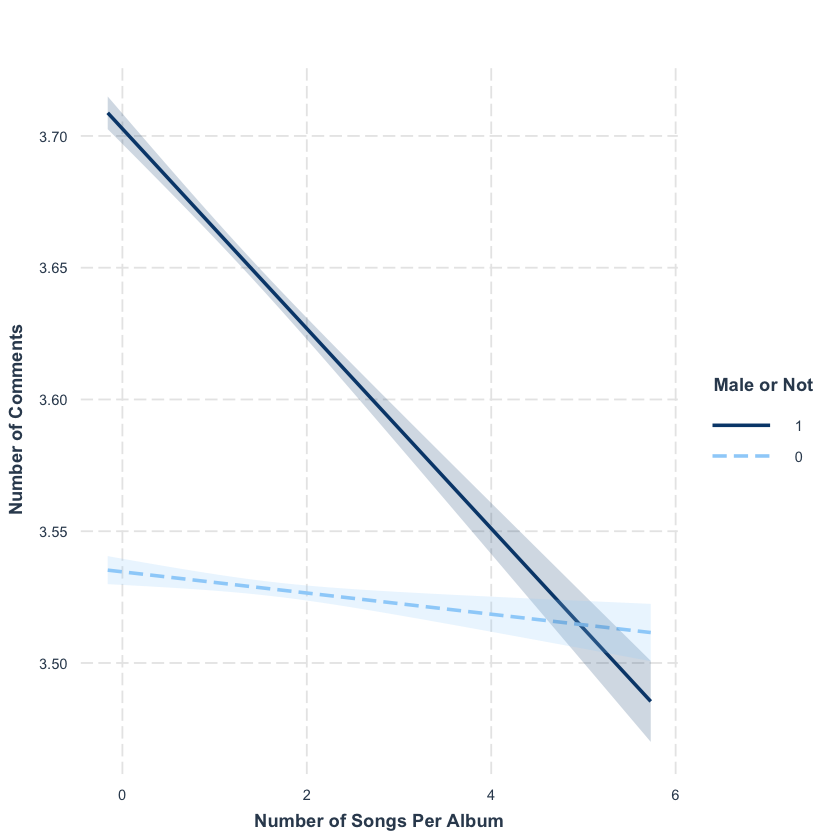

In [41]:
p<-interact_plot(model5c, pred =song_per_album_log, modx = male, 
                  #modx.values = c(0, 0.25, 0.5, 0.75, 1),
                 data = dat, interval = TRUE,int.width = 0.8,
                 x.label = "Number of Songs Per Album", y.label = "Number of Comments",
                 main.title = "",  legend.main = "Male or Not",)
p

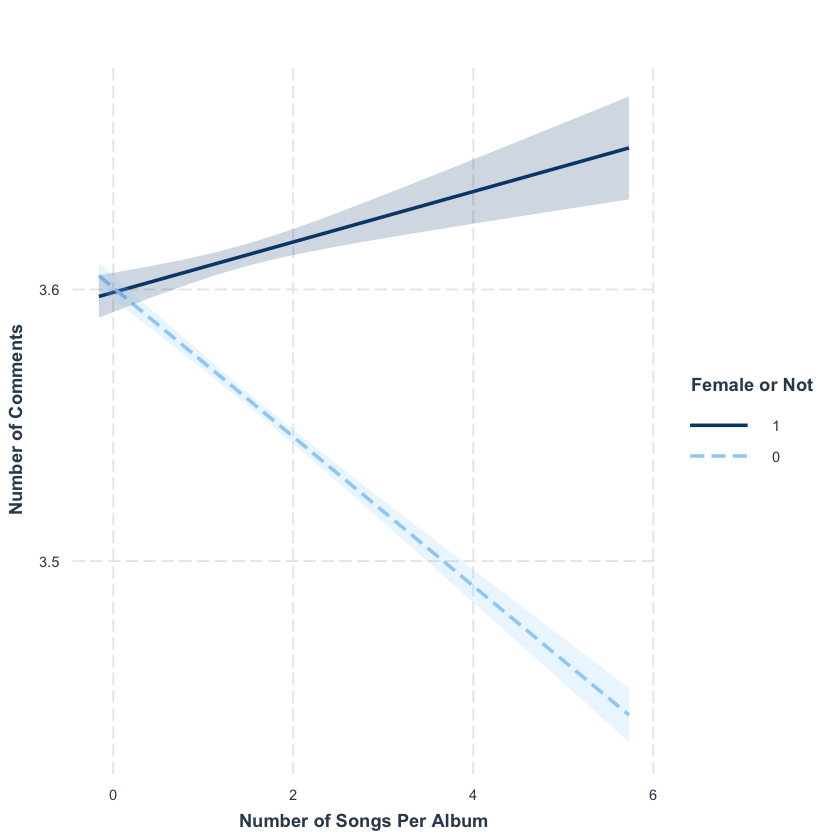

In [42]:
p<-interact_plot(model5c, pred =song_per_album_log, modx = female, 
                  #modx.values = c(0, 0.25, 0.5, 0.75, 1),
                 data = dat, interval = TRUE,int.width = 0.8,
                 x.label = "Number of Songs Per Album", y.label = "Number of Comments",
                 main.title = "",  legend.main = "Female or Not",)
p

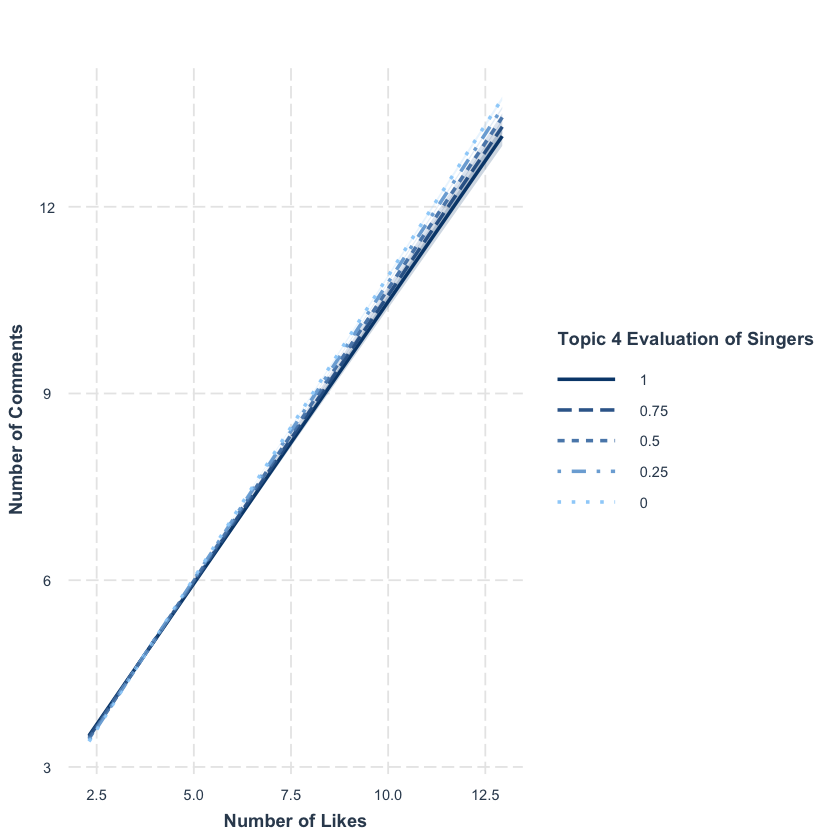

In [16]:
p<-interact_plot(model, pred =like_log, modx = model_topic4, 
                  modx.values = c(0, 0.25, 0.5, 0.75, 1),
                 data = dat, interval = TRUE,int.width = 0.8,
                 x.label = "Number of Likes", y.label = "Number of Comments",
                 main.title = "",  legend.main = "Topic 4 Evaluation of Singers",)
p

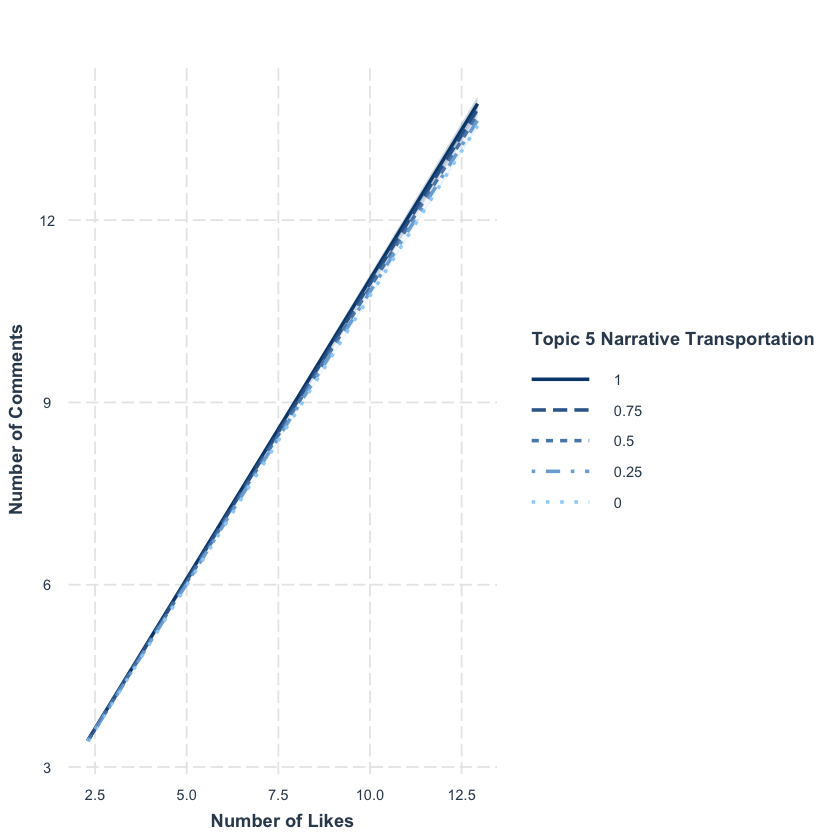

In [31]:
p<-interact_plot(model5, pred =like_log, modx = model_topic5, 
                  modx.values = c(0, 0.25, 0.5, 0.75, 1),
                 data = dat, interval = TRUE,int.width = 0.8,
                 x.label = "Number of Likes", y.label = "Number of Comments",
                 main.title = "",  legend.main = "Topic 5 Narrative Transportation",)
p

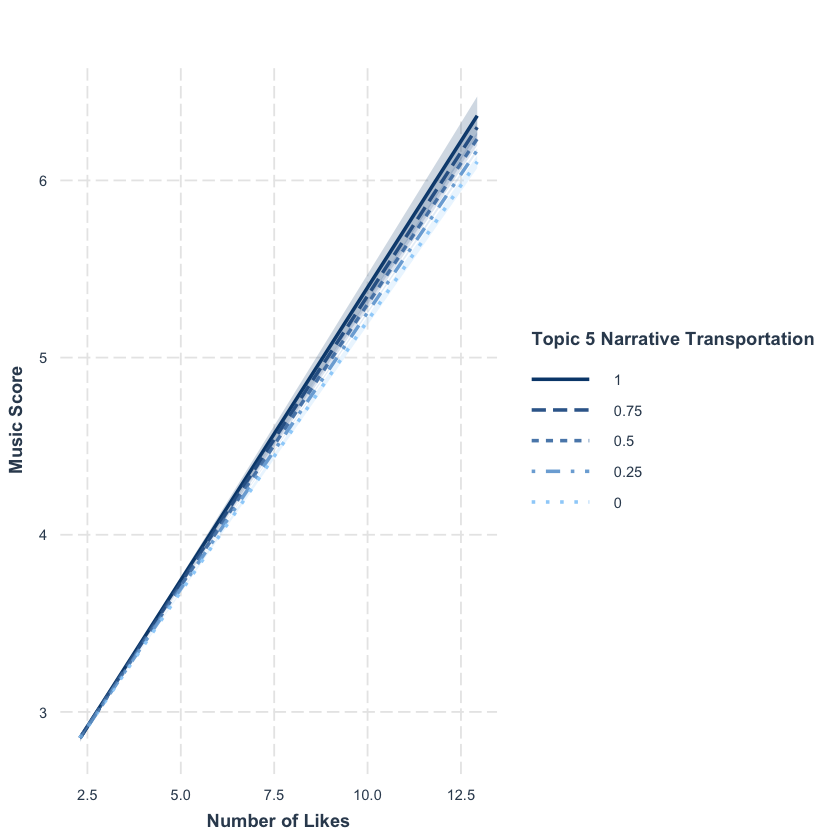

In [37]:
p<-interact_plot(model5b, pred =like_log, modx = model_topic5, 
                  modx.values = c(0, 0.25, 0.5, 0.75, 1),
                 data = dat, interval = TRUE,int.width = 0.8,
                 x.label = "Number of Likes", y.label = "Music Score",
                 main.title = "",  legend.main = "Topic 5 Narrative Transportation",)
p

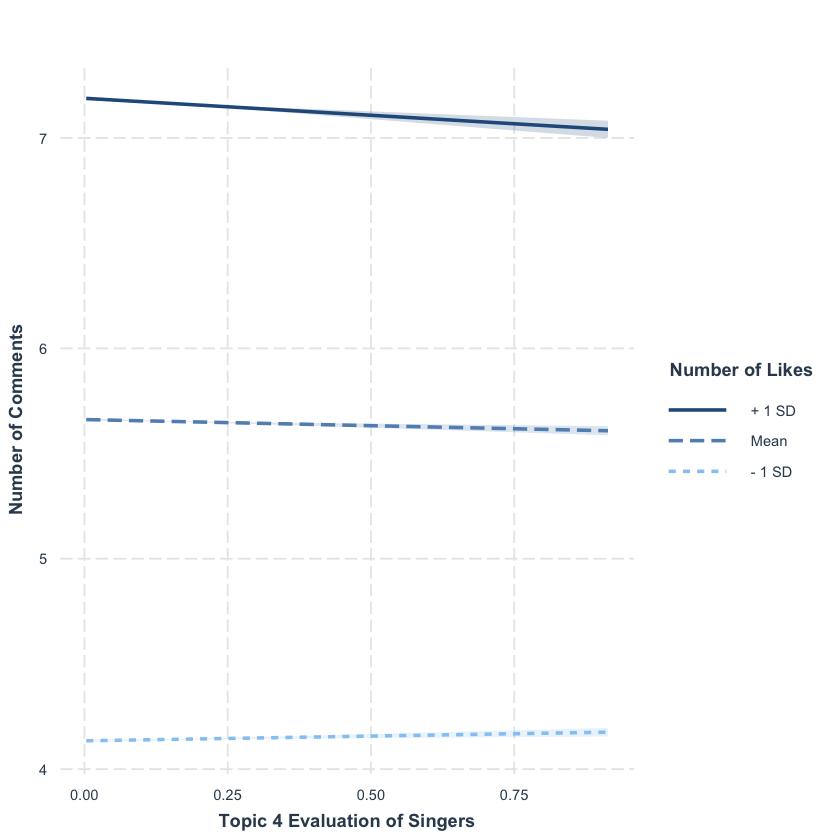

In [18]:
p<-interact_plot(model, pred =model_topic4, modx =  like_log, 
                  #modx.values = c(0, 0.25, 0.5, 0.75, 1),
                 data = dat, interval = TRUE,int.width = 0.8,
                 x.label = "Topic 4 Evaluation of Singers", y.label = "Number of Comments",
                 main.title = "",  legend.main = "Number of Likes",)
p

In [4]:
library(lme4)

Loading required package: Matrix



In [21]:
mixed = lmer(comment_log~like_log+male+female+like_log*male+
                 like_log*female+model_topic4+model_topic4*like_log + (1 | artist_name_x), data = dat)
summary(mixed)

Linear mixed model fit by REML ['lmerMod']
Formula: comment_log ~ like_log + male + female + like_log * male + like_log *  
    female + model_topic4 + model_topic4 * like_log + (1 | artist_name_x)
   Data: dat

REML criterion at convergence: 364868.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-11.7630  -0.6015   0.0137   0.6104   7.1959 

Random effects:
 Groups        Name        Variance Std.Dev.
 artist_name_x (Intercept) 0.1405   0.3748  
 Residual                  0.3843   0.6200  
Number of obs: 187644, groups:  artist_name_x, 6596

Fixed effects:
                       Estimate Std. Error t value
(Intercept)            1.242773   0.015125  82.166
like_log               0.963368   0.003124 308.345
male                   0.282117   0.017325  16.284
female                 0.136848   0.018400   7.438
model_topic4           0.225008   0.055388   4.062
like_log:male         -0.041567   0.002684 -15.484
like_log:female       -0.040615   0.002893 -14.038
like_log

In [20]:
help(lmer)

In [6]:
library(lmerTest)


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




In [25]:
mixed = lmer(comment_log~like_log+male+female+like_log*male+
                 like_log*female+model_topic4+model_topic4*like_log + (1 | artist_name_x), data = dat)
summary(mixed)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: comment_log ~ like_log + male + female + like_log * male + like_log *  
    female + model_topic4 + model_topic4 * like_log + (1 | artist_name_x)
   Data: dat

REML criterion at convergence: 364868.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-11.7630  -0.6015   0.0137   0.6104   7.1959 

Random effects:
 Groups        Name        Variance Std.Dev.
 artist_name_x (Intercept) 0.1405   0.3748  
 Residual                  0.3843   0.6200  
Number of obs: 187644, groups:  artist_name_x, 6596

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            1.243e+00  1.512e-02  5.632e+04  82.166  < 2e-16 ***
like_log               9.634e-01  3.124e-03  1.872e+05 308.345  < 2e-16 ***
male                   2.821e-01  1.733e-02  1.923e+04  16.284  < 2e-16 ***
female                 1.368e-01  1.840e-02  1.983e+04   7.438 1.07e-

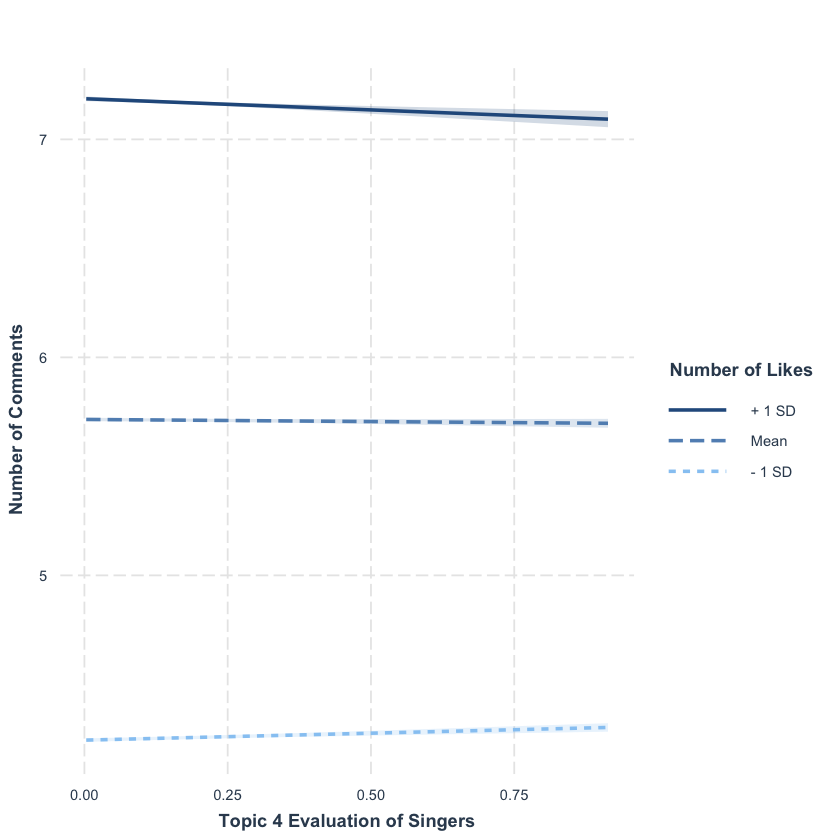

In [26]:
p<-interact_plot(mixed, pred =model_topic4, modx =  like_log, 
                  #modx.values = c(0, 0.25, 0.5, 0.75, 1),
                 data = dat, interval = TRUE,int.width = 0.8,
                 x.label = "Topic 4 Evaluation of Singers", y.label = "Number of Comments",
                 main.title = "",  legend.main = "Number of Likes",)
p

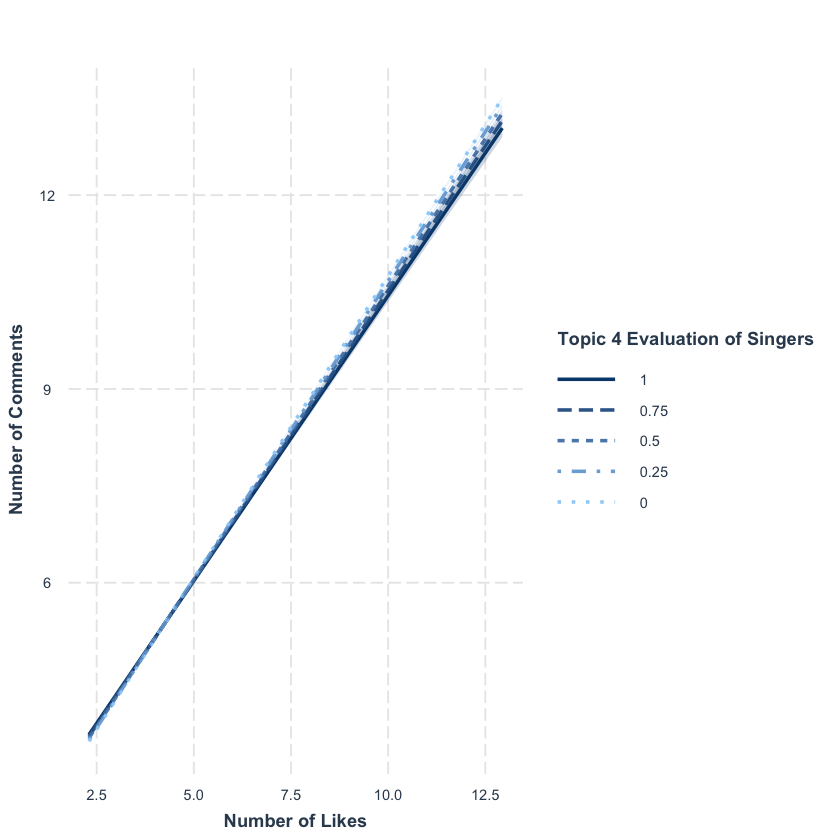

In [27]:
p<-interact_plot(mixed, pred =like_log, modx = model_topic4, 
                  modx.values = c(0, 0.25, 0.5, 0.75, 1),
                 data = dat, interval = TRUE,int.width = 0.8,
                 x.label = "Number of Likes", y.label = "Number of Comments",
                 main.title = "",  legend.main = "Topic 4 Evaluation of Singers",)
p